




http://wps.pearsoned.co.uk/ema_ge_stock_ie_3/193/49605/12699041.cw/content/index.html

CPS Data 
CPS92_08 Data (Stata Dataset)
CPS92_08 Data (Excel Dataset)
CPS92_08 Data Description (PDF)
CPS92_08 Data Description (WORD)
CPS08 Data (Stata Dataset)
CPS08 Data (Excel Dataset)
http://wps.pearsoned.co.uk/wps/media/objects/12401/12699039/empirical/empex_tb/cps08.xlsx
CPS08 Data Description (PDF)
CPS08 Data Description (WORD)

Documentation for CPS08 Data
Each month the Bureau of Labor Statistics in the U.S. Department of Labor
conducts the “Current Population Survey” (CPS), which provides data on labor force
characteristics of the population, including the level of employment, unemployment, and
earnings. Approximately 65,000 randomly selected U.S. households are surveyed each
month. The sample is chosen by randomly selecting addresses from a database
comprised of addresses from the most recent decennial census augmented with data on
new housing units constructed after the last census. The exact random sampling scheme
is rather complicated (first small geographical areas are randomly selected, then housing
units within these areas randomly selected); details can be found in the Handbook of
Labor Statistics and is described on the Bureau of Labor Statistics website
(www.bls.gov).
The survey conducted each March is more detailed than in other months and asks
questions about earnings during the previous year. The file CPS08 contains the data for
2008 (from the March 2009 survey). These data are for full-time workers, defined as
workers employed more than 35 hours per week for at least 48 weeks in the previous
year. Data are provided for workers whose highest educational achievement is (1) a high
school diploma, and (2) a bachelor’s degree.
Series in Data Set:
FEMALE: 1 if female; 0 if male
YEAR: Year
AHE : Average Hourly Earnings
BACHELOR: 1 if worker has a bachelor’s degree; 0 if worker has a high school degree






https://rpubs.com/dvorakt/219848





In [19]:
install.packages("AER")

Installing package into ‘/home/jon/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)
also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’, ‘SparseM’, ‘MatrixModels’, ‘pbkrtest’, ‘quantreg’, ‘car’, ‘lmtest’, ‘sandwich’, ‘zoo’, ‘Formula’




The downloaded source packages are in
	‘/tmp/Rtmpp6pDpC/downloaded_packages’


In [6]:
library(haven)
library(dplyr)
library(visreg)



CPS08 <- read_dta("http://wps.pearsoned.co.uk/wps/media/objects/12401/12699039/empirical/empex_tb/cps08.dta")
glimpse(CPS08)

Observations: 7,711
Variables: 5
$ ahe      <dbl> 38.461540, 12.500000, 9.857142, 8.241758, 17.788462, 10.09...
$ year     <dbl> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008...
$ bachelor <dbl> 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1...
$ female   <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1...
$ age      <dbl> 33, 31, 30, 30, 31, 29, 26, 28, 30, 25, 26, 25, 30, 31, 32...


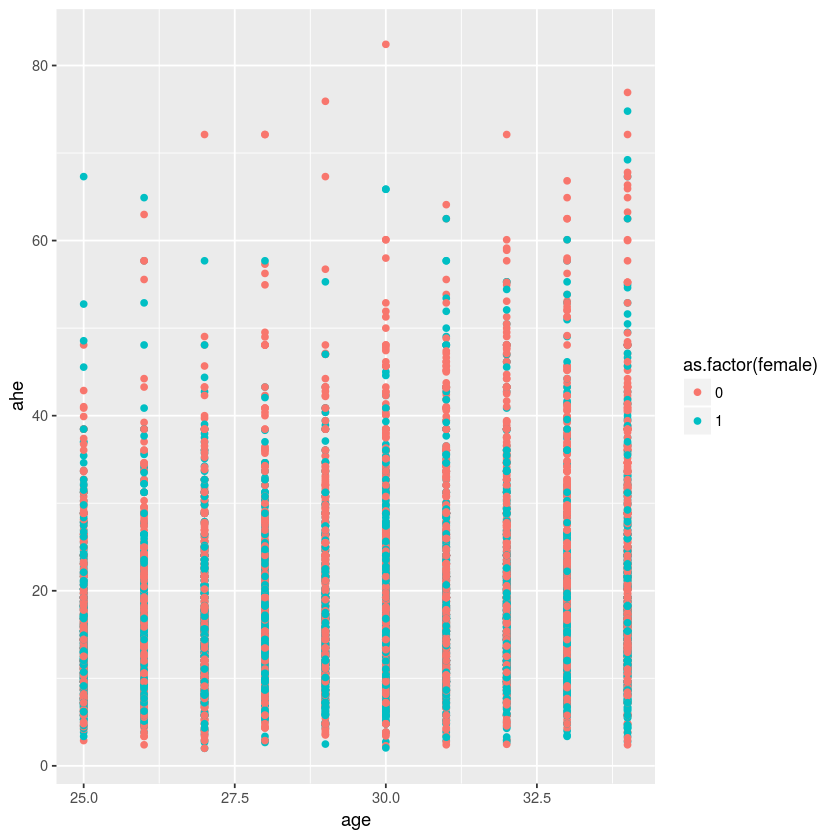

In [13]:
library(ggplot2)
p = ggplot(data = CPS08, mapping = aes(x=age  , y= ahe, color = as.factor(female))) 
p + geom_point()

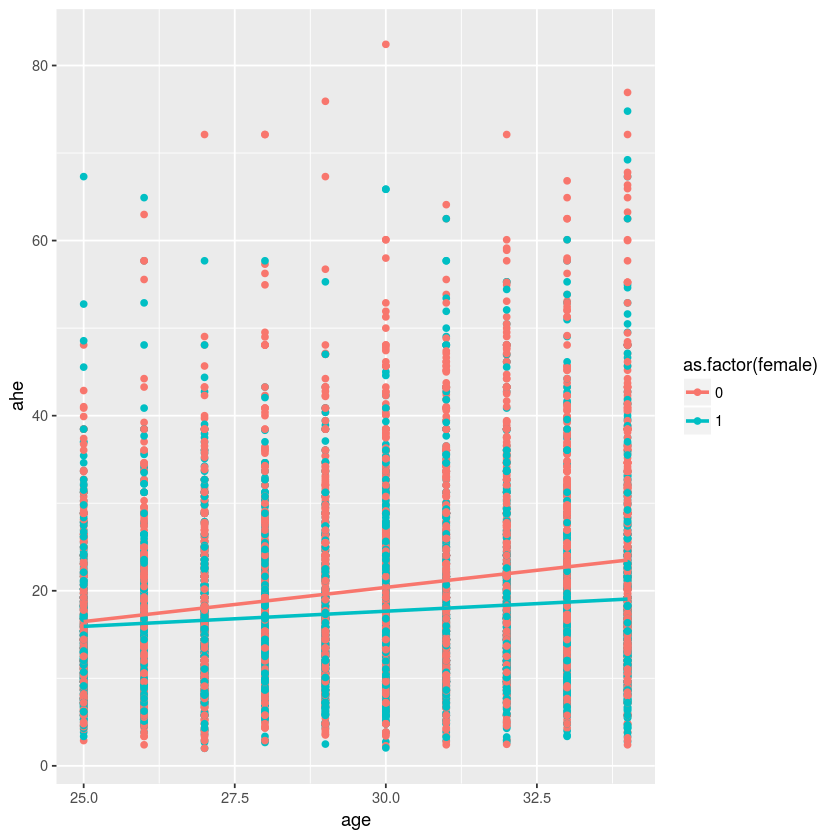

In [14]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

We know the data has information on over 62 thousand individuals, their salary, education, gender etc. Let’s estimate two simple regressions, one estimating the effect of age on salary and the other one estimating the effect of marital status on salary.







In [9]:
modela <- lm(ahe~age, CPS08)
modelb <- lm(ahe~age+female+bachelor, CPS08)
summary(modela)


Call:
lm(formula = ahe ~ age, data = CPS08)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.248  -6.964  -1.924   4.536  63.186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08228    1.18426   0.914    0.361    
age          0.60499    0.03985  15.180   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.992 on 7709 degrees of freedom
Multiple R-squared:  0.02902,	Adjusted R-squared:  0.0289 
F-statistic: 230.4 on 1 and 7709 DF,  p-value: < 2.2e-16


In [10]:
summary(modelb)


Call:
lm(formula = ahe ~ age + female + bachelor, data = CPS08)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.139  -5.773  -1.509   4.112  57.414 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.6357     1.0854  -0.586    0.558    
age           0.5852     0.0362  16.165   <2e-16 ***
female       -3.6640     0.2107 -17.391   <2e-16 ***
bachelor      8.0830     0.2088  38.709   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.072 on 7707 degrees of freedom
Multiple R-squared:  0.1998,	Adjusted R-squared:  0.1995 
F-statistic: 641.5 on 3 and 7707 DF,  p-value: < 2.2e-16


### 3. Presenting results from several regressions
In this exercise we estimated two regressions. When we have the need to present results from several regressions simultaneously we normally use a table where each regression is in a column, variables in rows and coefficient with t-stats or standard errors underneath the coefficients in parentheses. Package stargazer does a really good job of combining result from different models. Take a look:


In [17]:

library(stargazer)
stargazer(modela, modelb, type="text", digits = 2, intercept.bottom = FALSE)


Please cite as: 

 Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2. http://CRAN.R-project.org/package=stargazer 




                                   Dependent variable:               
                    -------------------------------------------------
                                           ahe                       
                              (1)                      (2)           
---------------------------------------------------------------------
Constant                      1.08                    -0.64          
                             (1.18)                   (1.09)         
                                                                     
age                         0.60***                  0.59***         
                             (0.04)                   (0.04)         
                                                                     
female                                               -3.66***        
                                                      (0.21)         
                                                                     
bachelor           

In [21]:
library(AER)
#library(car)
linearHypothesis(modelb,c( "female=0", "bachelor=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
7709,NA,NA,NA
7707,2,780.6001,1.976594e-309


In [22]:
linearHypothesis(modelb,c( "bachelor=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
7708,NA,NA,NA
7707,1,1444.218,8.183323e-290


In [23]:
linearHypothesis(modelb,c( "female=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
7708,NA,NA,NA
7707,1,311.4645,2.289258e-68


In [80]:
library(haven)
library(dplyr)
library(visreg)
lead <- read_dta("http://wps.aw.com/wps/media/objects/11422/11696965/data3eu/lead_mortality.dta")
glimpse(lead)

Observations: 172
Variables: 15
$ year          <dbl> 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900,...
$ city          <chr> "Alameda", "Albany", "Allegheny", "Allentown", "Altoo...
$ state         <chr> "CA", "NY", "PA", "PA", "PA", "NY", "MI", "GA", "NJ",...
$ age           <dbl> 28.95484, 30.34768, 27.08730, 27.76405, 27.03753, 28....
$ hardness      <dbl> 97, 43, 111, 176, 111, 43, 269, 15, 12, 120, 9, 47, 9...
$ ph            <dbl> 7.6, 7.3, 7.3, 7.7, 7.3, 7.3, 8.0, 6.8, 6.2, 6.8, 6.9...
$ infrate       <dbl> 0.1097561, 0.2986185, 0.4468413, 0.3841808, 0.4678663...
$ typhoid_rate  <dbl> 0.024390243, 0.041445270, 0.093990758, 0.028248588, 0...
$ np_tub_rate   <dbl> 0.030487806, 0.013815090, 0.027734976, 0.005649718, 0...
$ mom_rate      <dbl> 0.1951219, 0.1795962, 0.1926040, 0.1977401, 0.1825193...
$ population    <dbl> 164, 941, 1298, 354, 389, 209, 145, 898, 278, 303, 11...
$ precipitation <dbl> 1.850307, 3.278735, 3.350943, 3.350943, 3.350943, 3.2...
$ temperature   <dbl

In [81]:
#http://stackoverflow.com/questions/26581410/dplyr-summarizing-count-and-conditional-aggregate-functions-on-the-same-factor

lead  %>% mutate(infrate=as.numeric(as.character(infrate)), lead = as.factor(lead)) %>%
   group_by(lead) %>% summarise(avg.infrate=mean(infrate,na.rm=TRUE))



lead,avg.infrate
0,0.3811679
1,0.4032576


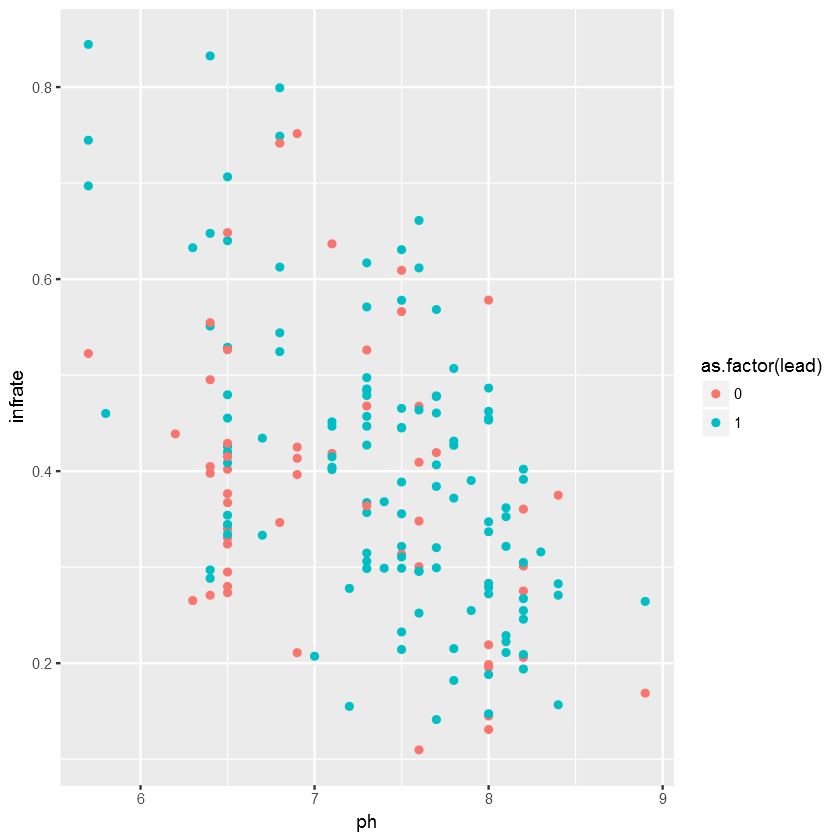

In [87]:
library(ggplot2)
p= ggplot(data = lead, mapping = aes(x=ph  , y=infrate, color = as.factor(lead))) 
p+ geom_point()

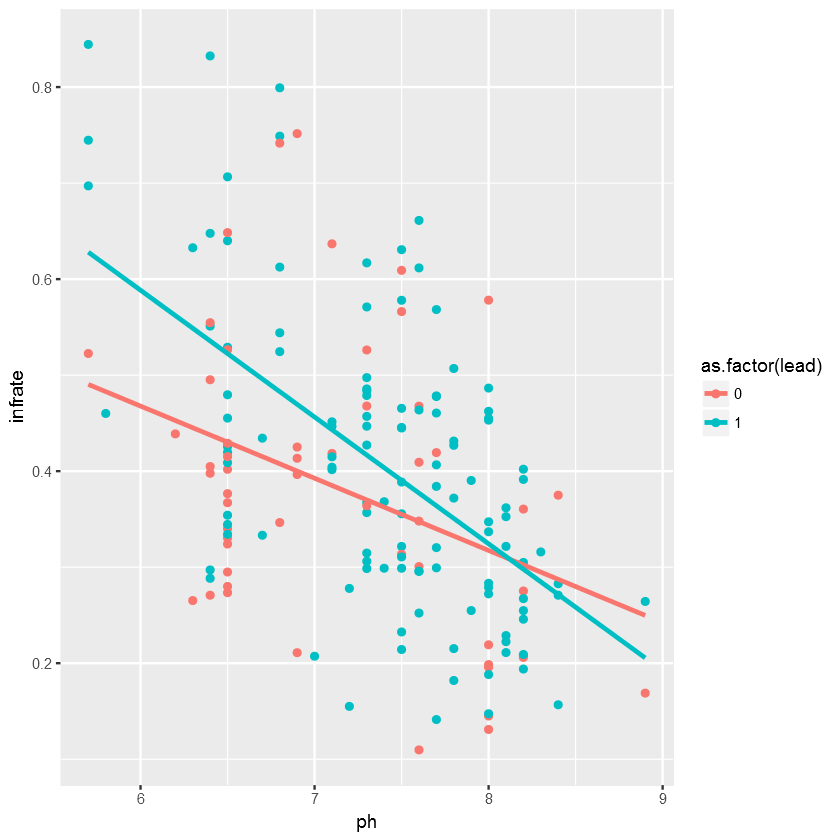

In [88]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

# , se = FALSE

In [82]:
t.test(formula = lead$infrate ~ lead$lead)


	Welch Two Sample t-test

data:  lead$infrate by lead$lead
t = -0.90387, df = 109.29, p-value = 0.3681
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07052551  0.02634606
sample estimates:
mean in group 0 mean in group 1 
      0.3811679       0.4032576 


In [83]:
t.test(lead$infrate[lead$lead== 0], lead$infrate[lead$lead== 1], "g", 1, FALSE, TRUE, 0.95)


	Two Sample t-test

data:  lead$infrate[lead$lead == 0] and lead$infrate[lead$lead == 1]
t = -41.289, df = 170, p-value = 1
alternative hypothesis: true difference in means is greater than 1
95 percent confidence interval:
 -0.06303082         Inf
sample estimates:
mean of x mean of y 
0.3811679 0.4032576 


In [84]:


mean(lead$infrate[lead$lead== 1])


[1] 0.4032576

In [93]:
#p307 version4
model1 <- lm(infrate~lead+ph+I(lead*ph),data = lead)
summary(model1)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [115]:
#http://drewdimmery.com/robust-ses-in-r/
#heteroskedasticity robust standard errors in R. In Stata, this is trivially easy: you simply add “, robust” to the end of your regression command (or , cluster(var) for cluster robust SEs). In R, there’s a bit more flexibility, but this comes at the cost of a little added complication. Simplest first.
require("sandwich")
require("lmtest")
model1$newse<-vcovHC(model1)
coeftest(model1,model1$newse)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   0.918904   0.155541  5.9078 1.876e-08 ***
lead          0.461798   0.213727  2.1607   0.03214 *  
ph           -0.075179   0.021689 -3.4663   0.00067 ***
I(lead * ph) -0.056862   0.028940 -1.9648   0.05108 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [100]:
#library(AER)
library(car)
linearHypothesis(model1,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
170,NA,NA,NA
168,2,3.936032,0.02135224


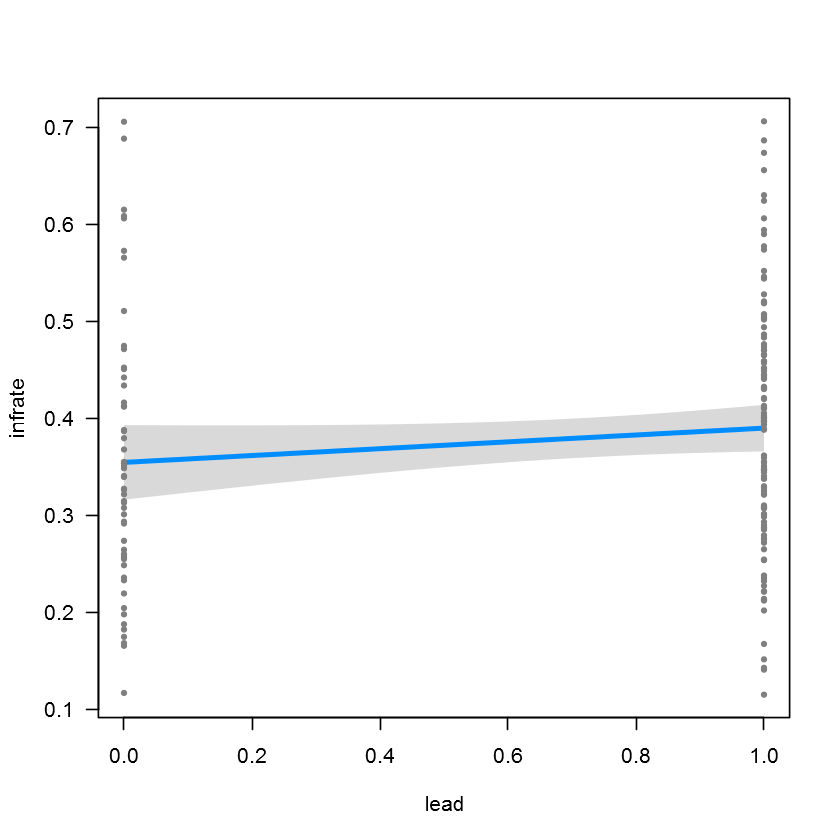

In [101]:
visreg(model1, "lead", type="conditional")

In [105]:
model2 <- lm(infrate~ lead +ph+I(lead*ph)+mom_rate+np_tub_rate+typhoid_rate,data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + mom_rate + 
    np_tub_rate + typhoid_rate, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.257169 -0.082441 -0.008178  0.085858  0.301600 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.76666    0.17964   4.268 3.32e-05 ***
lead          0.52205    0.21119   2.472 0.014454 *  
ph           -0.07123    0.02318  -3.073 0.002479 ** 
I(lead * ph) -0.06545    0.02900  -2.257 0.025334 *  
mom_rate      0.13247    0.29744   0.445 0.656630    
np_tub_rate   2.33233    0.80444   2.899 0.004249 ** 
typhoid_rate  1.25344    0.33841   3.704 0.000289 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1239 on 165 degrees of freedom
Multiple R-squared:  0.3536,	Adjusted R-squared:  0.3301 
F-statistic: 15.04 on 6 and 165 DF,  p-value: 1.069e-13


In [106]:
linearHypothesis(model2,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
167,NA,NA,NA
165,2,4.724529,0.01011028


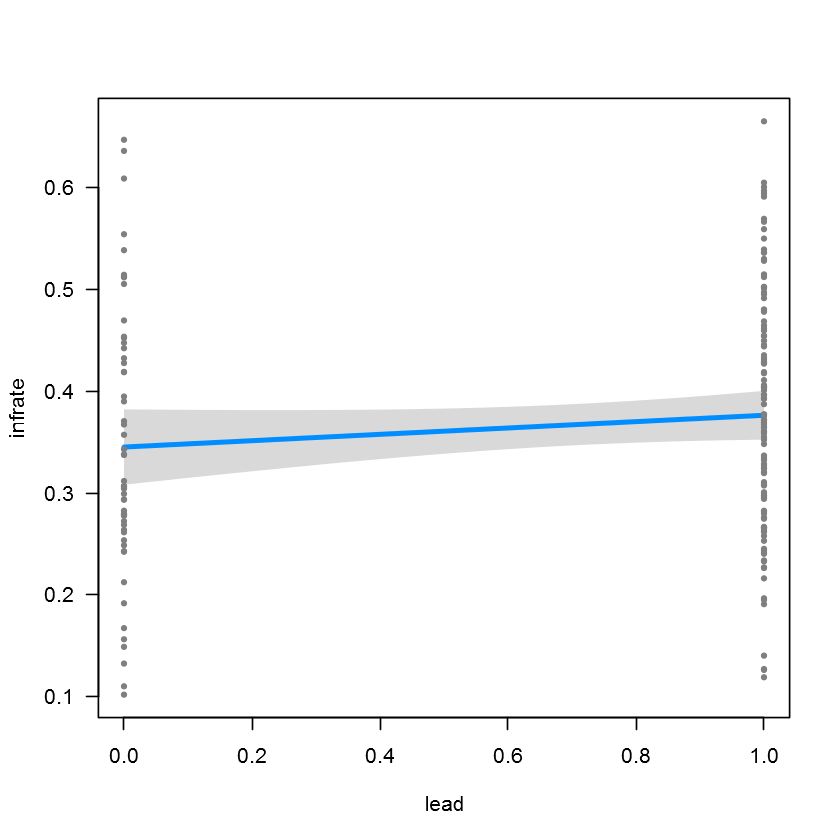

In [107]:
visreg(model2, "lead", type="conditional")

In [112]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+np_tub_rate+typhoid_rate+hardness+precipitation+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + np_tub_rate + 
    typhoid_rate + hardness + precipitation + temperature, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.298122 -0.081011 -0.008036  0.078393  0.312767 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.2124983  0.1989007   1.068 0.286936    
lead           0.4537721  0.2014461   2.253 0.025621 *  
ph            -0.0355440  0.0249430  -1.425 0.156066    
I(lead * ph)  -0.0551874  0.0276446  -1.996 0.047565 *  
np_tub_rate    2.0134319  0.7657999   2.629 0.009378 ** 
typhoid_rate   0.9341702  0.3308150   2.824 0.005337 ** 
hardness      -0.0001632  0.0001099  -1.485 0.139521    
precipitation  0.0727929  0.0197722   3.682 0.000315 ***
temperature    0.0022263  0.0020193   1.102 0.271883    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1164 on 163 degrees of freedom
Multiple R-squared:  0.4357,	Ad

In [113]:
linearHypothesis(model4,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
165,NA,NA,NA
163,2,4.410415,0.01363362


In [ ]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+hardness+precipitation+temperature,data = lead)
summary(model3)

In [92]:
model2 <- lm(infrate~ lead+ph+I(lead*ph),data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [90]:
mean(lead$ph)

[1] 7.322674

In [91]:
model3 <- lm(infrate~ as.factor(lead)+ph+I(lead*ph)+population+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ as.factor(lead) + ph + I(lead * ph) + 
    population + temperature, data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30337 -0.09061 -0.00859  0.07073  0.40042 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.736e-01  1.818e-01   3.705 0.000288 ***
as.factor(lead)1  3.485e-01  2.165e-01   1.609 0.109417    
ph               -8.844e-02  2.376e-02  -3.723 0.000270 ***
I(lead * ph)     -4.221e-02  2.973e-02  -1.420 0.157560    
population        1.821e-06  3.109e-06   0.586 0.558703    
temperature       6.971e-03  1.922e-03   3.626 0.000382 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.126 on 166 degrees of freedom
Multiple R-squared:  0.3266,	Adjusted R-squared:  0.3063 
F-statistic:  16.1 on 5 and 166 DF,  p-value: 6.275e-13
